# Revision questions for final

The revision comes from Wilks' textbook.
Will be important to do some of the simple calculations by hand.

In [74]:
using Pkg
Pkg.activate("..")
using CSV, DataFrames, Distances, Clustering, Statistics, Plots, StatsPlots

  Activating environment at `~/Documents/GitHub/MATH5271/Project.toml`


In [46]:
# Various data
datapath = joinpath("..", "Data")
A3_file = CSV.File(joinpath(datapath, "Wilks_TableA3.csv"))
df_A3 = DataFrame(A3_file)

,Year,Temperature,Precip_mm,Pressure_mb,El Niño (Y/N)
,Int64,Float64,String7,Float64,String1
1,1951,26.1,43,1009.5,Y
2,1952,24.5,10,1010.9,N
3,1953,24.8,4,1010.7,Y
4,1954,24.5,0,1011.2,N
5,1955,24.1,2,1011.9,N
6,1956,24.3,Missing,1011.2,N
7,1957,26.4,31,1009.3,Y
8,1958,24.9,0,1011.1,N
9,1959,23.7,0,1012.0,N


## Clustering

Fair to say I am not on top of this stuff so will need to revisit clustering again.
Compute distance matrix using Karl-Pearson distance for table A.3.
Use the correlation matrix here.

In [62]:
X = Matrix(df_A3[15:end, [:Temperature, :Pressure_mb]])
d = zeros(6, 6)
s = cor(X, dims = 2)

for i in 1:length(X[:, 1])
    for j in 1:length(X[:, 2])
        d[i, j] = sqrt( sum([(1 / s[k, k]) * (X[i, k] - X[j, k])^2 for k in 1:2]))
    end
end

d

6×6 Matrix{Float64}:
 0.0       3.28024   2.16333   2.90689   0.632456  1.56525
 3.28024   0.0       1.41421   0.728011  3.8833    1.99249
 2.16333   1.41421   0.0       0.806226  2.69072   0.640312
 2.90689   0.728011  0.806226  0.0       3.46554   1.44222
 0.632456  3.8833    2.69072   3.46554   0.0       2.06155
 1.56525   1.99249   0.640312  1.44222   2.06155   0.0

Now look at various clustering methods.

Here is what the `Hclust` type looks like:

```julia
struct Hclust{T<:Real}
    merges::Matrix{Int} # the tree merge sequence. 1st column: left subtree, 2nd column: right subtree
    heights::Vector{T}  # subtrees heights (aggregated distance between its elements)
    order::Vector{Int}  # the order of datapoint (leaf node) indices in the final tree
    linkage::Symbol     # subtree distance type (cluster linkage)
end
```

and to plot the dendogram need to use `StatsPlots`.
Hard to gain real info from the dendogram.
Main thing is to note the change in the y axis, though I am not quite sure what this means right at this stage.
Not sure if I can do the centroid method or the Ward method on the raw data with this package.

### Single linkage

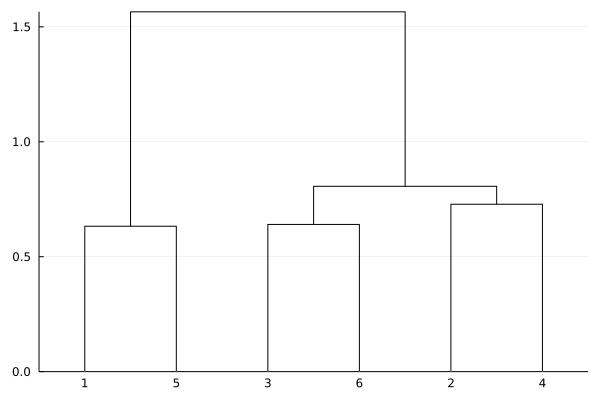

In [75]:
sl_clust = hclust(d; linkage = :single)
plot(sl_clust)

### Complete linkage

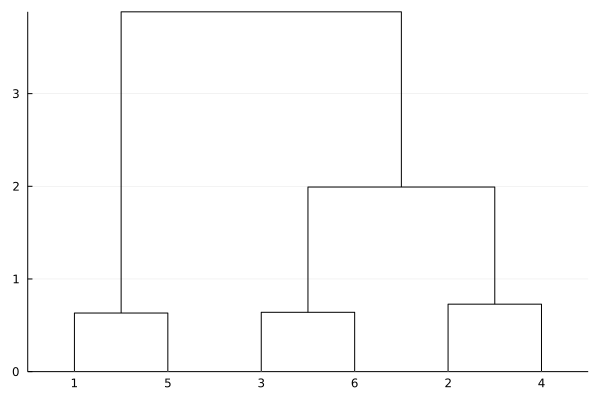

In [76]:
cp_clust = hclust(d; linkage = :complete)
plot(cp_clust)

### Average linkage

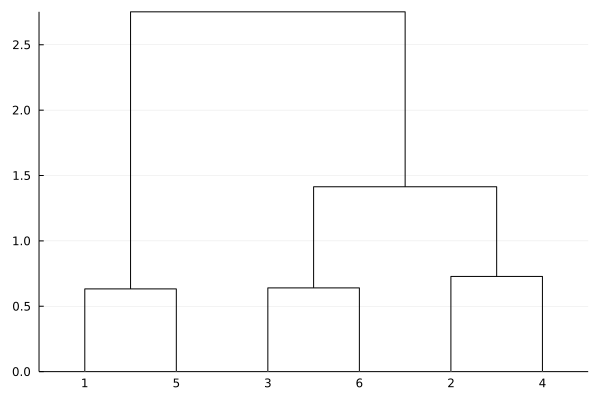

In [77]:
av_clust = hclust(d; linkage = :average)
plot(av_clust)

### K means

Using initial groups $G_{1} = \{1965, 1966, 1967\}$ and $G_{2} = \{1968, 1969, 1970\}$.

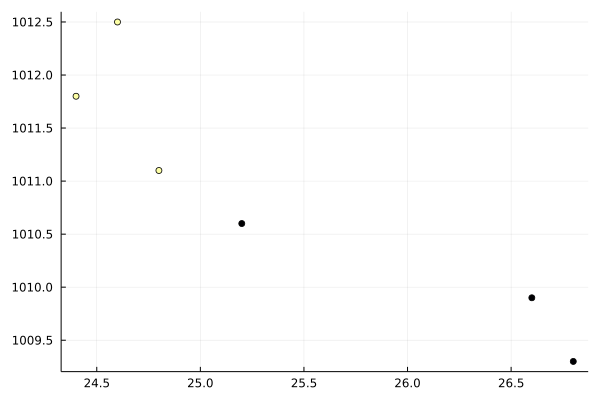

In [108]:
group = [1, 1, 1, 2, 2, 2]
X = [X group]

result = kmeans(X', 2)

scatter(X[:, 1], X[:, 2], marker_z = result.assignments, colorbar = false, label = false)